# Data
* **huge ammount of data from 2008 -2017**
* **time series based dataset - split based on time**


Our Dataset Consist Of 76015 rows and 13 cols namely:
* mid - match id
* date - when matches are played
* venue - place where matches aew played
* bat_team - batting team
* bowl_team - bowling team
* batsman - batsman
* bowler - bowler
* runs - runs scored
* wickets - wickets
* overs - overs - next 3 are based on this
* run_last_5 - runs scored  in last 5 overs
* wicket_last_5 - wickets in last 5 overs
* stricker - batsman playing as main 1
* non-striker - batsman playing as runner up - not main 0
* total - total score **(target variable)**

# Approach

**We can predict as taken `team1 , team2 , overs , run , venue , wickets , previous match` for same overs what was the the actual score` , this helps in predicticting total score**

# First Innings Score Predictions

In [1]:
# dependecies
import pandas as pd
import pickle


# loading dataset
df = pd.read_csv('ipl.csv')
df.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222


# EDA

In [2]:
#checking shape of data
df.shape

(76014, 15)

In [3]:
# check null values and then sum it up
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [4]:
# Check summary stats using df.describe()
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [5]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

<AxesSubplot:>

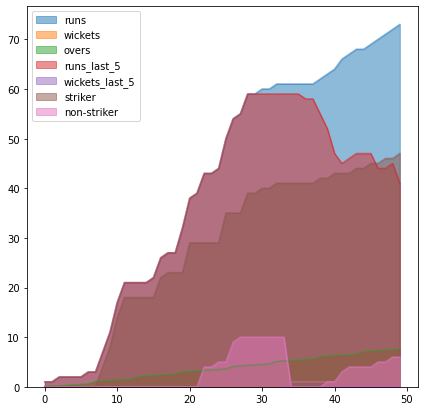

In [6]:
# plot area / contributions in dataset
df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']][:50].plot(kind = 'area', figsize = (7,7), stacked = False)

# Data Cleaning

In [7]:
# Removing unwanted cols - reduce memory size
cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)


In [8]:
#corss check
df.head(3)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222


In [9]:
df.shape

(76014, 9)

In [10]:
# checking for how many batting teams are there
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [11]:
# only keep current team which are present
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [8]:
# filtering based on consistency
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

In [9]:
# printing out unique team after filtering
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [16]:
# since for every match one can predict more accurately if one has 5 over data so,
# filtering based on 5 overs
df = df[df['overs']>=5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [11]:
# converting date cols from string to date time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Data Processing

In [12]:
# converting categorical features using 'One Hot Encoding' # for numerical values
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])

In [13]:
# getting cols
cat_df.columns 

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [14]:
# rearranging cols
cat_df = cat_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]

In [15]:
# split the data into train and test - based on date column
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

In [16]:
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

In [17]:
# since the requirement of our date colum is over so we can drop it
# dropping date column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

# Model Building
- Building model 
- Saving Model Using Pickle

## Linear Regression Model

In [20]:
# intial buid 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predictions
Evaluating Our Model

In [21]:
prediction = reg.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


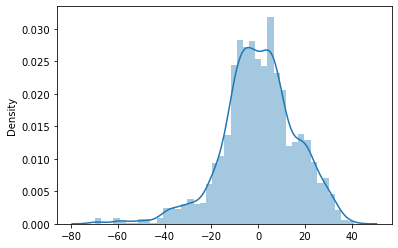

In [24]:
# plottoing our fit
import seaborn as sns
sns.distplot(y_test-prediction)

In [26]:
# checking for scores
from sklearn import metrics
import numpy as np # dependency

# Mean Absolute Error
print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error  
print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  12.118617546193288
MSE:  251.0079231041743
RMSE:  15.843229566732102


In [26]:
# creating our model pickel file - saving model
file_name = 'ipl_score_predict_model.pkl'
pickle.dump(reg , open(file_name,'wb'))